regression problem, our dataset in about GRE score(out of 340), TOEfL scores(out of 120), University rating, undergraduate GPA(out of 10), research experience(0 or 1), strength of their statement of purpose and LOR, we need to predict the chance of their admission(ranging from 0 to 1)


In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/deep learning/projects/Admission_Predict.csv")

# New Section

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
# as we dont need the column - "Serial No." so we can drop it.
# then we will scale our values using minmax(as we know upper bound and lower bound) scalling and not standardscaller
# we have 7 inputs, and 7 nodes in hidden layer and 1 node in the output layer

In [8]:
df.drop(columns=['Serial No.'])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
x = df.iloc[:, 0:-1]
# we are extracting text for all rows and 0 to -1 columns
y = df.iloc[:, -1]
# this is for all rows and -1 columns

In [10]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
336,337,319,110,3,3.0,2.5,8.79,0
64,65,325,111,3,3.0,3.5,8.70,0
55,56,320,103,3,3.0,3.0,7.70,0
106,107,329,111,4,4.5,4.5,9.18,1
300,301,309,106,2,2.5,2.5,8.00,0
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled
# this will contain a numpy array where our x_train is scaled to similar values

array([[0.84422111, 0.58      , 0.64285714, ..., 0.375     , 0.63782051,
        0.        ],
       [0.16080402, 0.7       , 0.67857143, ..., 0.625     , 0.60897436,
        0.        ],
       [0.13819095, 0.6       , 0.39285714, ..., 0.5       , 0.28846154,
        0.        ],
       ...,
       [0.29396985, 0.        , 0.42857143, ..., 0.375     , 0.21153846,
        0.        ],
       [0.11809045, 0.98      , 0.96428571, ..., 0.75      , 0.92948718,
        0.        ],
       [0.4321608 , 0.64      , 0.64285714, ..., 1.        , 0.74679487,
        1.        ]])

### USING MACHINE LEARNING MODEL - MULTIPLE LINEAR REGRESSION

In [16]:
from sklearn.linear_model import LinearRegression
Linear_regression = LinearRegression()

In [17]:
pred_LinearRegression = Linear_regression.fit(x_train_scaled, y_train)

In [18]:
y_pred = pred_LinearRegression.predict(x_test_scaled)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7594824470194685

### USING DEEP LEARNING MODEL

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [22]:
# Example data: replace this with your actual data
# Assuming x_train and x_test have shape (num_samples, num_features)
# and y_train, y_test are the corresponding labels
num_samples = 1000
num_features = 7

# Generate dummy data for illustration
x_train = np.random.rand(num_samples, num_features)
y_train = np.random.randint(2, size=num_samples)
x_test = np.random.rand(200, num_features)
y_test = np.random.randint(2, size=200)

# Define the model
model = Sequential()

# Adding layers (hidden, output)
model.add(Dense(7, activation='relu', input_dim=num_features))  # Input layer + hidden layer
model.add(Dense(7, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Fit the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
32/32 [==============================] - 3s 10ms/step - loss: 3.9208 - accuracy: 0.5340 - val_loss: 2.9180 - val_accuracy: 0.5050
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.3282 - accuracy: 0.5340 - val_loss: 0.9156 - val_accuracy: 0.4950
Epo

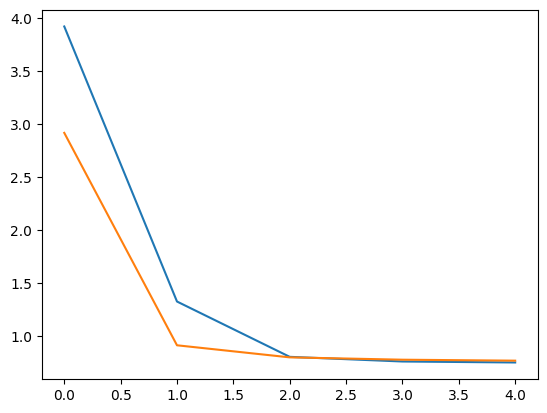

In [26]:
# plotting training loass and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# we can see that there is no overfitting